# Text Modeling

## Amittai Siavava, Data Mining (Fall 2023)

In this assignment, we ask you to create a classifier for detecting spam. Please populate this Jupyter notebook with your code and embedded results (outputs, figures, etc) and submit it on Canvas as a zip file.  <B

Useful libraries for this assignment: <br>
(1) sklearn
(2) nltk
(3) gensim

In [1]:
# install libraries if nonexistent.

# %pip install sklearn
# %pip install nltk
# %pip install gensim
# %pip install pandas
# %pip install matplotlib
# %pip install seaborn
# %pip install wordcloud
# %pip install IPython

import nltk
import gensim
import pandas as pd
import matplotlib as plt
import seaborn as sns
import wordcloud

import sklearn
import sklearn.ensemble
import sklearn.linear_model

# %pip install IPython
from IPython.display import display, Markdown

from typing import List, Tuple, Dict, Set, Optional


## Q1 (76 points)
You have been provided a spam dataset (SPAM.csv). Each line in the dataset corresponds to one message and has a label of either "ham" or "spam". In this assignment, you are experimenting with different features and models to create the best spam detector possible.  

Load the data into a dataframe. Divide the data into a random train/test set with the ratio 85/15. Finally, use sklearn to run the following experiments.

In [2]:
# load csv file
df = pd.read_csv('SPAM.csv')
display(df.head(5))

# convert label to binary
df['Category'] = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)
display(df.head(5))

# split into train (85%) and test (15%) sets
train, test = sklearn.model_selection.train_test_split(df, test_size=0.15, random_state=42)

display(Markdown(
  f"""
  #### Dataset Stats
  - columns:    {list(df.columns)}
  - Total size: {len(df)}
  - Train size: {len(train)}
  - Test size:  {len(test)}
  """
))


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."



  #### Dataset Stats
  - columns:    ['Category', 'Message']
  - Total size: 5572
  - Train size: 4736
  - Test size:  836
  

### (A)[10 points] Train and evaluate the following models:


#### (A.1) Logistic Regression (LR)


### (A)[10 points] Train and evaluate the following models

- (1) Logistic Regression (LR)
- (2) Random Forest (RF)

### (B)[24 points] and the combination of all following preprocessing (total of 8 combinations):

- (1) with and without lowercasing
- (2) with and without stopword removal
- (3) with and without lemmatization

### (C)[24 points] and the following lexical features (total of 6 combinations):

- (1) unigrams
- (2) unigrams and bigrams
- (3) unigrams, bigrams and trigrams
- (4) tfidf unigrams
- (5) tfidf  unigrams and bigrams
- (6) tfidf unigrams, bigrams and trigrams

So that's 2 model types x 8 possible prepreocessing x 6 possible features = 96 models

### (D)[10 points] Create a dataframe where each row is one of the models and 15 columns.

_The first 9 columns should be boolean and capture if the model used the following:_

- (1) lowercased: 1 / 0
- (2) stopwords_removed: 1 / 0
- (3) lemmatized: 1 / 0
- (4) unigrams : 1 / 0
- (5) bigrams :  1 / 0
- (6) trigrams :  1 / 0
- (7) tfidf unigrams :  1 / 0
- (8) tfidf bigrams :  1 / 0
- (9) tfidf trigrams :  1 / 0

_The last 6 columns should show the default f1 (default parameters), weighted f1, and accuracy of the models on the **train** and **test** sets_

- (10) `f1_train`
- (11) `weighted_f1_train`
- (12) `accuracy_train`
- (13) `f1_test`
- (14) `weighted_f1_test`
- (15) `accuracy_test`

> HINT 1: You should convert the "spam" category to 1 and the "ham" category to 0, sklearn models can only work with numbers.
>
> HINT 2: You should make the whole thing systematically using good coding convetion instead of copy and pasting the models!
> I have created a partial skeleton template for Q1 below to guide you with this.
> You do NOT have to use this. This is just for your benefit.
> I have not included templates for the other questions.


In [3]:
def preprocess(tokenized_text, *, lowercase=False, remove_stopwords=False,lemmatize=False):
    
    cleaned_tokenized_text = tokenized_text.copy()
    
    if lowercase:
        cleaned_tokenized_text = [token.lower() for token in tokenized_text]
        
    if remove_stopwords:
        stopwords = nltk.corpus.stopwords.words('english')
        cleaned_tokenized_text = [token for token in tokenized_text if token not in stopwords]
        
    if lemmatize:
        lemmatizer = nltk.stem.WordNetLemmatizer()
        cleaned_tokenized_text = [lemmatizer.lemmatize(token) for token in tokenized_text]
        
    # convert back to pd.Series
    cleaned_tokenized_text = pd.Series(cleaned_tokenized_text)

    return cleaned_tokenized_text


In [4]:
def extract_features(cleaned_tokenized_text: Tuple[List[str], List[str]], *, tfidf=False, ngram_range=(1,1)):
    
    # initialize vectorizer
    # - by default, we use a count vectorizer
    # - if tfidf is true, we use a tfidf vectorizer
    if tfidf:
        vectorizer = sklearn.feature_extraction.text.TfidfVectorizer(ngram_range=ngram_range)
    else:
        vectorizer = sklearn.feature_extraction.text.CountVectorizer(ngram_range=ngram_range)
        
    # fit the vactorizer
    vectorizer.fit(cleaned_tokenized_text[0])
    
    # transform the text into feature vectors
    features = (vectorizer.transform(split) for split in cleaned_tokenized_text)
    
    """
        NOTE: the above two can be done in one go with `fit_transform`,
        but I've split it up for clarity.
    """
    
    return *features, vectorizer


In [5]:
def train_model(model_type, *, train_features, train_labels):
    
    # initialize model
    match model_type:
        case 'LR':
            model = sklearn.linear_model.LogisticRegression()
        case 'RF':
            model = sklearn.ensemble.RandomForestClassifier()
        case _:
            raise ValueError(f'Invalid model type: {model_type}')
    
    # fit model to training features and labels
    trained_model = model.fit(train_features, train_labels)
    
    return trained_model


In [6]:
def evaluate_model(trained_model, *, split="test", metric=None, eval_features, eval_labels):
    
    # predict on evaluation features
    predictions = trained_model.predict(eval_features)
    
    results = {}
    
    results[f"accuracy_{split}"] = sklearn.metrics.accuracy_score(eval_labels, predictions)
    
    results[f"weighted_f1_{split}"] = sklearn.metrics.f1_score(eval_labels, predictions, average='weighted')
    results[f"f1_{split}"] = sklearn.metrics.f1_score(eval_labels, predictions)
    
    return results


In [7]:
def process(results: pd.DataFrame, train_df, test_df, *, lowercase=False, remove_stopwords=False, lemmatize=False, ngram_range=(1,1), tfidf=False):
    clean_tokenized_train = preprocess(train_df["Message"],lowercase=lowercase, remove_stopwords=remove_stopwords, lemmatize=lemmatize)
    clean_tokenized_test = preprocess(test_df["Message"], lowercase=lowercase, remove_stopwords=remove_stopwords, lemmatize=lemmatize)
    train_features, test_features, vectorizer = extract_features( (clean_tokenized_train, clean_tokenized_test), tfidf=tfidf, ngram_range=ngram_range)

    # train model
    for model_type in ('LR', 'RF'):
        model = train_model(model_type, train_features=train_features, train_labels=train['Category'])

        results.loc[len(results)] = {
            'model_type': model_type,
            "model": model,
            'lowercased': lowercase,
            'stopwords_removed': remove_stopwords,
            'lemmatized': lemmatize,
            'unigrams': (not tfidf) and 1 in range(ngram_range[0], ngram_range[1]+1),
            'bigrams': (not tfidf) and 2 in range(ngram_range[0], ngram_range[1]+1),
            'trigrams': (not tfidf) and 3 in range(ngram_range[0], ngram_range[1]+1),
            'tfidf_unigrams': tfidf and 1 in range(ngram_range[0], ngram_range[1]+1),
            'tfidf_bigrams': tfidf and 2 in range(ngram_range[0], ngram_range[1]+1),
            'tfidf_trigrams': tfidf and 3 in range(ngram_range[0], ngram_range[1]+1),
            **evaluate_model(model, split="train", eval_features=train_features, eval_labels=train_df['Category']),
            **evaluate_model(model, split="test", eval_features=test_features, eval_labels=test_df['Category'])
        }


In [8]:
results = pd.DataFrame(columns=[
    'model_type',
    'model',
    'lowercased',
    'stopwords_removed',
    'lemmatized',
    'unigrams',
    'bigrams',
    'trigrams',
    'tfidf_unigrams',
    'tfidf_bigrams',
    'tfidf_trigrams',
    'f1_train',
    'weighted_f1_train',
    'accuracy_train',
    'f1_test',
    'weighted_f1_test',
    'accuracy_test'
])

results.head()


,model_type,model,lowercased,stopwords_removed,lemmatized,unigrams,bigrams,trigrams,tfidf_unigrams,tfidf_bigrams,tfidf_trigrams,f1_train,weighted_f1_train,accuracy_train,f1_test,weighted_f1_test,accuracy_test


In [9]:
# try all combinations of preprocessing and vectorization
count = 1
for lowercase in (True, False):
  for remove_stopwords in (True, False):
    for lemmatize in (True, False):
      for ngram_range in ((1,1), (1,2), (1,3)):
        for tfidf in (True, False):
          if count % 16 == 0:
            print(f'Processed {count} combinations')
          count += 2
          process(results, train, test, lowercase=lowercase, remove_stopwords=remove_stopwords, lemmatize=lemmatize, ngram_range=ngram_range, tfidf=tfidf)

results.head()


,model_type,model,lowercased,stopwords_removed,lemmatized,unigrams,bigrams,trigrams,tfidf_unigrams,tfidf_bigrams,tfidf_trigrams,f1_train,weighted_f1_train,accuracy_train,f1_test,weighted_f1_test,accuracy_test
0,LR,LogisticRegression(),True,True,True,False,False,False,True,False,False,0.900855,0.974518,0.975507,0.885417,0.972372,0.973684
1,RF,"(DecisionTreeClassifier(max_features='sqrt', r...",True,True,True,False,False,False,True,False,False,1.000000,1.000000,1.000000,0.908163,0.977612,0.978469
2,LR,LogisticRegression(),True,True,True,True,False,False,False,False,False,0.992126,0.997881,0.997889,0.945813,0.986535,0.986842
3,RF,"(DecisionTreeClassifier(max_features='sqrt', r...",True,True,True,True,False,False,False,False,False,1.000000,1.000000,1.000000,0.891192,0.973692,0.974880
4,LR,LogisticRegression(),True,True,True,False,False,False,True,True,False,0.850987,0.962686,0.964949,0.836957,0.961551,0.964115


In [10]:
results


,model_type,model,lowercased,stopwords_removed,lemmatized,unigrams,bigrams,trigrams,tfidf_unigrams,tfidf_bigrams,tfidf_trigrams,f1_train,weighted_f1_train,accuracy_train,f1_test,weighted_f1_test,accuracy_test
0,LR,LogisticRegression(),True,True,True,False,False,False,True,False,False,0.900855,0.974518,0.975507,0.885417,0.972372,0.973684
1,RF,"(DecisionTreeClassifier(max_features='sqrt', r...",True,True,True,False,False,False,True,False,False,1.000000,1.000000,1.000000,0.908163,0.977612,0.978469
2,LR,LogisticRegression(),True,True,True,True,False,False,False,False,False,0.992126,0.997881,0.997889,0.945813,0.986535,0.986842
3,RF,"(DecisionTreeClassifier(max_features='sqrt', r...",True,True,True,True,False,False,False,False,False,1.000000,1.000000,1.000000,0.891192,0.973692,0.974880
4,LR,LogisticRegression(),True,True,True,False,False,False,True,True,False,0.850987,0.962686,0.964949,0.836957,0.961551,0.964115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,RF,"(DecisionTreeClassifier(max_features='sqrt', r...",False,False,False,True,True,False,False,False,False,1.000000,1.000000,1.000000,0.873684,0.969711,0.971292
92,LR,LogisticRegression(),False,False,False,False,False,False,True,True,True,0.790170,0.948826,0.953125,0.817680,0.957365,0.960526
93,RF,"(DecisionTreeClassifier(max_features='sqrt', r...",False,False,False,False,False,False,True,True,True,1.000000,1.000000,1.000000,0.855615,0.965665,0.967703
94,LR,LogisticRegression(),False,False,False,True,True,True,False,False,False,0.996865,0.999154,0.999155,0.919192,0.980192,0.980861


### (E)[4 points]

Which model has the best weighted f1 according to the train set?

Which model has the best weighted f1 according to the test set?

### (F)[4 points]

Show the confusion matrix for the best-performing model on the test set.
Explain what each element of the matrix means.


In [11]:
# best weighted f1 per train set
best_f1_train = results.sort_values(by='weighted_f1_train', ascending=False).iloc[0]
display(Markdown(
  f"""
  #### Best Weighted F1 Model (Train)
  - Model: {best_f1_train['model'][0]}
  - Lowercased: {best_f1_train['lowercased']}
  - Stopwords Removed: {best_f1_train['stopwords_removed']}
  - Lemmatized: {best_f1_train['lemmatized']}
  - Unigrams: {best_f1_train['unigrams']}
  - Bigrams: {best_f1_train['bigrams']}
  - Trigrams: {best_f1_train['trigrams']}
  - TFIDF Unigrams: {best_f1_train['tfidf_unigrams']}
  - TFIDF Bigrams: {best_f1_train['tfidf_bigrams']}
  - TFIDF Trigrams: {best_f1_train['tfidf_trigrams']}
  - Weighted F1 (Train): {best_f1_train['weighted_f1_train']}
  - Weighted F1 (Test): {best_f1_train['weighted_f1_test']}
  """
))

best_f1_test = results.sort_values(by='weighted_f1_test', ascending=False).iloc[0]
display(Markdown(
  f"""
  #### Best Weighted F1 Model (Test)
  - Model: {best_f1_test['model']}
  - Lowercased: {best_f1_test['lowercased']}
  - Stopwords Removed: {best_f1_test['stopwords_removed']}
  - Lemmatized: {best_f1_test['lemmatized']}
  - Unigrams: {best_f1_test['unigrams']}
  - Bigrams: {best_f1_test['bigrams']}
  - Trigrams: {best_f1_test['trigrams']}
  - TFIDF Unigrams: {best_f1_test['tfidf_unigrams']}
  - TFIDF Bigrams: {best_f1_test['tfidf_bigrams']}
  - TFIDF Trigrams: {best_f1_test['tfidf_trigrams']}
  - Weighted F1 (Train): {best_f1_test['weighted_f1_train']}
  - Weighted F1 (Test): {best_f1_test['weighted_f1_test']}
  """
))



  #### Best Weighted F1 Model (Train)
  - Model: DecisionTreeClassifier(max_features='sqrt', random_state=1004315633)
  - Lowercased: False
  - Stopwords Removed: False
  - Lemmatized: False
  - Unigrams: True
  - Bigrams: True
  - Trigrams: True
  - TFIDF Unigrams: False
  - TFIDF Bigrams: False
  - TFIDF Trigrams: False
  - Weighted F1 (Train): 1.0
  - Weighted F1 (Test): 0.9629303961197919
  


  #### Best Weighted F1 Model (Test)
  - Model: LogisticRegression()
  - Lowercased: False
  - Stopwords Removed: False
  - Lemmatized: False
  - Unigrams: True
  - Bigrams: False
  - Trigrams: False
  - TFIDF Unigrams: False
  - TFIDF Bigrams: False
  - TFIDF Trigrams: False
  - Weighted F1 (Train): 0.9978814877524047
  - Weighted F1 (Test): 0.986534874309315
  

In [13]:
# recreate params

def reprocess(best_f1_test, *, train_split=train["Message"], test_split=test["Message"], retrain=False, print_confusion_matrix=True):
  lowercase = best_f1_test['lowercased']
  remove_stopwords = best_f1_test['stopwords_removed']
  lemmatize = best_f1_test['lemmatized']
  tf_idf = any([best_f1_test['tfidf_unigrams'], best_f1_test['tfidf_bigrams'], best_f1_test['tfidf_trigrams']])
  if not tf_idf:
    ngram_range = (1, 3 if best_f1_test['trigrams'] else 2 if best_f1_test['bigrams'] else 1)
  else:
    ngram_range = (1, 3 if best_f1_test['tfidf_trigrams'] else 2 if best_f1_test['tfidf_bigrams'] else 1)

  # # preprocess data
  clean_tokenized_train = preprocess(train_split,lowercase=lowercase, remove_stopwords=remove_stopwords,lemmatize=lemmatize)
  clean_tokenized_test = preprocess(test_split, lowercase=lowercase, remove_stopwords=remove_stopwords,lemmatize=lemmatize)

  # # extract features
  train_features, test_features, _ = extract_features( (clean_tokenized_train, clean_tokenized_test), tfidf=tf_idf, ngram_range=ngram_range)
  # test_features = vectorizer.transform(clean_tokenized_test)

  # predict on test data
  if not retrain:
    best_model = best_f1_test['model']
  else:
    best_model = train_model(best_f1_test['model_type'], train_features=train_features, train_labels=train['Category'])
  
  predictions = best_model.predict(test_features)

  # compute confusion matrix
  confusion_matrix = pd.DataFrame(
      sklearn.metrics.confusion_matrix(test['Category'], predictions),
      index=['ham', 'spam'],
      columns=['ham', 'spam']
    )

  if print_confusion_matrix:
    display(Markdown(
      f"""
  #### Confusion Matrix
  
  - Model: {best_f1_test['model']}
  - True Positives: {confusion_matrix['spam']['spam']} -- correctly identified spam
  - True Negatives: {confusion_matrix['ham']['ham']} -- correctly identified ham
  - False Positives: {confusion_matrix['ham']['spam']} -- incorrectly identified spam
  - False Negatives: {confusion_matrix['spam']['ham']} -- incorrectly identified ham
  """
    ))
    
  return best_model, test_features, confusion_matrix

reprocess(best_f1_test)



  #### Confusion Matrix
  
  - Model: LogisticRegression()
  - True Positives: 96 -- correctly identified spam
  - True Negatives: 729 -- correctly identified ham
  - False Positives: 11 -- incorrectly identified spam
  - False Negatives: 0 -- incorrectly identified ham
  

(LogisticRegression(),
 <836x7949 sparse matrix of type '<class 'numpy.int64'>'
 	with 10292 stored elements in Compressed Sparse Row format>,
       ham  spam
 ham   729     0
 spam   11    96)

### Q2 (56 points)
**(A)[40 points]** Repeat the experiment for the best-performing combination of model type, preprocessing, and lexical features above, but this time limit the analysis to all the combinations of the parts-of-speeches below (total of 8 combinations):<br>

(1) Adjectives <br>
(2) Nouns  <br>
(3) Verbs  <br>

What this means is that after tokenization and before preprocessing, you remove all words that do not have the part of speech you are looking at. E.g., for the combination Adjectives & Nouns, all words that are not a noun or adjective should be removed. <br>

So that's 8 new models. <br>

**(B)[10 points]** Create a new dataframe where each row is one of the models. The dataframe should have 3 boolean columns capturing which parts-of-speech were used: <br>

(1) adjectives : 1 / 0 <br>
(2) nouns : 1 / 0 <br>
(3) verbs : 1 / 0 <br>
 
and 3 columns showing the default f1 (default parameters), weighted f1, and accuracy of the models on the **test** set only: <br>

(4) f1_test <br>
(5) weighted_f1_test <br>
(6) accuracy_test <br>

**(C)[6 points]** <br>
Which model has the best weighted f1 according to the test set? <br>
Show the confusion matrix for the best-performing model on the test set. <br>

In [14]:
#Your code here. Feel free to make as many cells as needed

# best model

# best vectorizer
# best_vectorizer = vectorizer
# import nltk
# nltk.download('punkt')

# new df with only adjectives, nouns, verbs, and 
results_2 = pd.DataFrame(columns=[
  'model_type',
  'adjectives',
  'nouns',
  'verbs',
  'f1_test',
  'weighted_f1_test',
  'accuracy_test'
])



def filter_words(adjectives: bool, nouns: bool, verbs: bool, train_split=None, test_split=None) -> tuple[list[str], list[str]]:
  # limit to adjectives, nouns, and verbs if applicable
    # filter train and test["Message"] to only adjectives, nouns, and verbs
  filtered_train = train_split if train_split is not None else train["Message"].copy()
  filtered_test = test_split if test_split is not None else test["Message"].copy()
  
  # tokenize
  filtered_train = filtered_train.apply(nltk.word_tokenize)
  filtered_test = filtered_test.apply(nltk.word_tokenize)
  
  # get pos tags
  filtered_train = filtered_train.apply(nltk.pos_tag)
  filtered_test = filtered_test.apply(nltk.pos_tag)
  
  if adjectives or nouns or verbs:
    
    # filter to only adjectives, nouns, and verbs
    filtered_train = filtered_train.apply(lambda x: [word for word, tag in x if (adjectives and tag.startswith('JJ')) or (nouns and tag.startswith('NN')) or (verbs and tag.startswith('VB'))])
    filtered_test = filtered_test.apply(lambda x: [word for word, tag in x if (adjectives and tag.startswith('JJ')) or (nouns and tag.startswith('NN')) or (verbs and tag.startswith('VB'))])  
    
  else:
    # keep all except adjectives, nouns, and verbs
    filtered_train = filtered_train.apply(lambda x: [word for word, tag in x if not (tag.startswith('JJ') or tag.startswith('NN') or tag.startswith('VB'))])
    filtered_test = filtered_test.apply(lambda x: [word for word, tag in x if not (tag.startswith('JJ') or tag.startswith('NN') or tag.startswith('VB'))])
    
      
  # join back into strings
  filtered_train = filtered_train.apply(lambda x: ' '.join(x))
  filtered_test = filtered_test.apply(lambda x: ' '.join(x))
  
  return filtered_train, filtered_test

# metrics
for adjectives in (True, False):
  for nouns in (True, False):
    for verbs in (True, False):
      
      filtered_train, filtered_test = filter_words(adjectives, nouns, verbs)
      
      # filtered_train_features, filtered_test_features, filtered_vectorizer = extract_features( (filtered_train, filtered_test), tfidf=tf_idf, ngram_range=ngram_range)
      
      # filtered_train, filtered_test = filter_words(adjectives, nouns, verbs)
        
      model, test_features, confusion_matrix = reprocess(best_f1_test, train_split=filtered_train, test_split=filtered_test, retrain=True, print_confusion_matrix=False)
      # train model
      # best_model_2 = train_model(best_f1_test['model_type'], train_features=filtered_train, train_labels=train['Category'])
      
      # predict on test data
      # predictions = model.predict(test_features)
      
      # evaluate model and add to df
      results_2.loc[len(results_2)] = {
        'model_type': best_f1_test['model_type'],
        'adjectives': adjectives,
        'nouns': nouns,
        'verbs': verbs,
        **evaluate_model(model, split="test", eval_features=test_features, eval_labels=test['Category'])
      }
      
results_2


,model_type,adjectives,nouns,verbs,f1_test,weighted_f1_test,accuracy_test
0,LR,True,True,True,0.924623,0.981473,0.982057
1,LR,True,True,False,0.924623,0.981473,0.982057
2,LR,True,False,True,0.763441,0.943903,0.947368
3,LR,True,False,False,0.598726,0.912379,0.924641
4,LR,False,True,True,0.935323,0.984016,0.984450
5,LR,False,True,False,0.902564,0.976312,0.977273
6,LR,False,False,True,0.625767,0.916852,0.927033
7,LR,False,False,False,0.817680,0.957365,0.960526


In [15]:
best_f1_test_2 = results_2.sort_values(by='weighted_f1_test', ascending=False).iloc[0]
display(Markdown(
  f"""
  #### Best Weighted F1 Model (Test)
  - Model: {best_f1_test_2['model_type']}
  - Adjectives: {best_f1_test_2['adjectives']}
  - Nouns: {best_f1_test_2['nouns']}
  - Verbs: {best_f1_test_2['verbs']}
  - Weighted F1 (Test): {best_f1_test_2['weighted_f1_test']}
  """
))



  #### Best Weighted F1 Model (Test)
  - Model: LR
  - Adjectives: False
  - Nouns: True
  - Verbs: True
  - Weighted F1 (Test): 0.9840156051504227
  

### Q3 (68 points)

**(A)[32 points]** Repeat the experiment for the best-performing model type from Q1 (i.e., LR or RF) using the following features (no preprocessing is required): <br>
(1) Word2Vec features from GoogleNews (limit vocabulary to 40000 words) <br>
(2) Features from a new Word2Vec model trained on the **train** set of your dataset. Use the following hyperparameters: window=5,vector_size=100 ,min_count=5 <br>

You can average the semantic embeddings for the words in a document to create a single semantic vector for the document. You can ignore words that are not present in your Word2Vec model. <br>

**(B)[10 points]** Use weighted f1 on the test set to pick the best semantic features from the two options above and combine them with the best-performing features from Q2 to train a new model. <br>

**(C)[20 points]** Finally, create a new dataframe where each row is one of the following models: <br>
(1) Best-performing model using lexical features only (Q1).  <br>
(2) Best-performing model using lexical features on different parts-of-speech (Q2).  <br>
(3) Best-performing model from using semantic features only (Q3-A).  <br>
(4) The final model from Q3-B that combines the best semantic and lexical features.  <br>

<br>
The dataframe should have boolean columns capturing which (if any) preprocessing techniques were used: <br>
<br>

(1) lowercased: 1 / 0 <br>
(2) stopwords_removed: 1 / 0 <br>
(3) lemmatized: 1 / 0 <br>

<br>
which (if any) parts-of-speech were used: <br>
<br>

(4) adjectives : 1 / 0 <br>
(5) nouns : 1 / 0 <br>
(6) verbs : 1 / 0 <br>
(7) all: 1 / 0  (this is for the best-performing Q1 model that uses all parts-of-speech)<br>


<br>
which (if any) lexical features were used: <br>
<br>

(8) unigrams : 1 / 0 <br>
(9) bigrams :  1 / 0 <br>
(10) trigrams :  1 / 0 <br>
(11) tfidf unigrams :  1 / 0 <br>
(12) tfidf bigrams :  1 / 0 <br>
(13) tfidf trigrams :  1 / 0 <br>


<br>
which (if any) semantic features were used: <br>
<br>

(14) w2v_GoogleNews : 1 / 0 <br>
(15) w2v_Span=m : 1 / 0 <br>

 
and 3 columns showing the default f1 (default parameters), weighted f1, and accuracy of the four models on the **test** set only: <br>

(16) f1_test <br>
(17) weighted_f1_test <br>
(18) accuracy_test <br>

**(D)[6 points]**
Which model has the best weighted f1 according to the test set? <br> 
Show the confusion matrix for the best-performing model on the test set. <br>

In [16]:
import gensim.downloader

def word_2_vec(df: pd.DataFrame, *, new="False"):
  if not new:
    # load pretrained model, limit vocab to 40000 words
    model_path = gensim.downloader.load('word2vec-google-news-300', return_path=True)    
    model = gensim.models.KeyedVectors.load_word2vec_format(model_path, binary=True, limit=40000)
  else:
    # create new w2v model and fit on train data. limit vocabulary to 40000 words
    sentences = df["Message"].to_list()
    split_sentences = list(map(lambda x: x.split(), sentences))
    model = gensim.models.Word2Vec(sentences=split_sentences, window=5, vector_size=100, min_count=5)
    model = model.wv
    
  return model

wv = word_2_vec(train, new=False)    
# print vocabulary
# print(wv.vocab)
wv.most_similar(positive=["bad"], topn=5)


[('good', 0.7190051078796387),
 ('terrible', 0.6828611493110657),
 ('horrible', 0.6702598333358765),
 ('Bad', 0.669891893863678),
 ('lousy', 0.6647640466690063)]

In [17]:
import numpy as np
# average semantic embeddings for all words in each message
def avg_semantic_embedding(train_split_tokenized, test_split_tokenized, *, wv):
  # sentences = df["Message"].to_list()
  # split_sentences = list(map(lambda x: x.split(), sentences))
  # avg_embeddings = []
  avg_embeddings_train, avg_embeddings_test = [], []
  for sentence in train_split_tokenized:
    avg_embedding = np.zeros(wv.vector_size)
    for word in sentence:
      if word in wv:
        avg_embedding += wv[word]
    if len(sentence):
      avg_embedding /= len(sentence)
    avg_embeddings_train.append(avg_embedding)
    
  for sentence in test_split_tokenized:
    avg_embedding = np.zeros(wv.vector_size)
    for word in sentence:
      if word in wv:
        avg_embedding += wv[word]
    if len(sentence):
      avg_embedding /= len(sentence)
    avg_embeddings_test.append(avg_embedding)
  return avg_embeddings_train, avg_embeddings_test


In [18]:
google_wv = word_2_vec(train, new=False)
new_wv = word_2_vec(train, new=True)

train_text_tokenized = train["Message"].apply(nltk.word_tokenize)
test_text_tokenized = test["Message"].apply(nltk.word_tokenize)

train_embeddings_google, test_embeddings_google = avg_semantic_embedding(train_text_tokenized, test_text_tokenized, wv=google_wv)
train_embeddings_new, test_embeddings_new = avg_semantic_embedding(train_text_tokenized, test_text_tokenized, wv=new_wv)

# test_embeddings_google = avg_semantic_embedding(test, wv=google_wv)
# test_embeddings_new = avg_semantic_embedding(test, wv=new_wv)

print(len(train_embeddings_google))
print(len(test_embeddings_new))


4736
836


In [19]:
# train LR model
model_google = train_model('LR', train_features=train_embeddings_google, train_labels=train['Category'])
model_new = train_model('LR', train_features=train_embeddings_new, train_labels=train['Category'])

# predict on test data
predictions_google = model_google.predict(test_embeddings_google)
predictions_new = model_new.predict(test_embeddings_new)

# evaluate models
results_google = evaluate_model(model_google, split="test", eval_features=test_embeddings_google, eval_labels=test['Category'])
results_new = evaluate_model(model_new, split="test", eval_features=test_embeddings_new, eval_labels=test['Category'])


print(f'Accuracy (google): {results_google["accuracy_test"]}')
print(f'Weighted F1 (google): {results_google["weighted_f1_test"]}')
print(f'F1 (google): {results_google["f1_test"]}\n\n')


print(f'Accuracy (new): {results_new["accuracy_test"]}')
print(f'Weighted F1 (new): {results_new["weighted_f1_test"]}')
print(f'F1 (new): {results_new["f1_test"]}\n\n')

print(results_google)
print(results_new)


Accuracy (google): 0.9485645933014354
Weighted F1 (google): 0.9453189366220608
F1 (google): 0.7700534759358288


Accuracy (new): 0.8720095693779905
Weighted F1 (new): 0.8123897457847349
F1 (new): 0.0


{'accuracy_test': 0.9485645933014354, 'weighted_f1_test': 0.9453189366220608, 'f1_test': 0.7700534759358288}
{'accuracy_test': 0.8720095693779905, 'weighted_f1_test': 0.8123897457847349, 'f1_test': 0.0}


In [20]:
# combine google w2v with the best-performing parameters above
lowercase = best_f1_test['lowercased']
remove_stopwords = best_f1_test['stopwords_removed']
lemmatize = best_f1_test['lemmatized']
# tf_idf = any([best_f1_test['tfidf_unigrams'], best_f1_test['tfidf_bigrams'], best_f1_test['tfidf_trigrams']])
# if not tf_idf:
#   ngram_range = (1, 3 if best_f1_test['trigrams'] else 2 if best_f1_test['bigrams'] else 1)
# else:
#   ngram_range = (1, 3 if best_f1_test['tfidf_trigrams'] else 2 if best_f1_test['tfidf_bigrams'] else 1)

tokenized_train_split = train["Message"] # .apply(nltk.word_tokenize)
tokenized_test_split = test["Message"] # .apply(nltk.word_tokenize)


# # preprocess data
clean_tokenized_train = preprocess(tokenized_train_split,lowercase=lowercase, remove_stopwords=remove_stopwords,lemmatize=lemmatize)
clean_tokenized_test = preprocess(tokenized_test_split, lowercase=lowercase, remove_stopwords=remove_stopwords,lemmatize=lemmatize)

final_adjectives = False
final_nouns = True
final_verbs = True

# filter words to only adjectives, nouns, and verbs as appropriate
filtered_train_2, filtered_test_2 = filter_words(final_adjectives, final_nouns, final_verbs, train_split=clean_tokenized_train, test_split=clean_tokenized_test)

# get avg semantic embeddings
filtered_train_text_tokenized = filtered_train_2.apply(nltk.word_tokenize)
filtered_test_text_tokenized = filtered_test_2.apply(nltk.word_tokenize)

filtered_train_embeddings_google, filtered_test_embeddings_google = avg_semantic_embedding(filtered_train_text_tokenized, filtered_test_text_tokenized, wv=google_wv)

# train model
model_google_2 = train_model('LR', train_features=filtered_train_embeddings_google, train_labels=train['Category'])

# predict on test data
predictions_google_2 = model_google_2.predict(filtered_test_embeddings_google)

# evaluate model
results_google_2 = evaluate_model(model_google_2, split="test", eval_features=filtered_test_embeddings_google, eval_labels=test['Category'])

print(f'Accuracy (google): {results_google_2["accuracy_test"]}')
print(f'Weighted F1 (google): {results_google_2["weighted_f1_test"]}')
print(f'F1 (google): {results_google_2["f1_test"]}\n\n')


Accuracy (google): 0.9449760765550239
Weighted F1 (google): 0.9413528858912712
F1 (google): 0.7526881720430108




In [21]:
# build extended dataframe

extended_df = pd.DataFrame(columns=[
  'model_type',
  'lowercased',
  'stopwords_removed',
  'lemmatized',
  'unigrams',
  'bigrams',
  'trigrams',
  'tfidf_unigrams',
  'tfidf_bigrams',
  'tfidf_trigrams',
  'adjectives',
  'nouns',
  'verbs',
  'w2v_Google',
  'w2v_Span',
  'f1_test',
  'weighted_f1_test',
  'accuracy_test'
])

# append everything in 'results' df, with False for nonexistent columns
for index, row in results.iterrows():
  extended_df.loc[len(extended_df)] = {
    'model_type': row['model_type'],
    'lowercased': row['lowercased'],
    'stopwords_removed': row['stopwords_removed'],
    'lemmatized': row['lemmatized'],
    'unigrams': row['unigrams'],
    'bigrams': row['bigrams'],
    'trigrams': row['trigrams'],
    'tfidf_unigrams': row['tfidf_unigrams'],
    'tfidf_bigrams': row['tfidf_bigrams'],
    'tfidf_trigrams': row['tfidf_trigrams'],
    'adjectives': False,
    'nouns': False,
    'verbs': False,
    'w2v_Google': False,
    'w2v_Span': False,
    'f1_test': row['f1_test'],
    'weighted_f1_test': row['weighted_f1_test'],
    'accuracy_test': row['accuracy_test']
  }
  
# append everything in 'results_2' df, with False for nonexistent columns
for index, row in results_2.iterrows():
  extended_df.loc[len(extended_df)] = {
    'model_type': row['model_type'],
    'lowercased': False,
    'stopwords_removed': False,
    'lemmatized': False,
    'unigrams': False,
    'bigrams': False,
    'trigrams': False,
    'tfidf_unigrams': False,
    'tfidf_bigrams': False,
    'tfidf_trigrams': False,
    'adjectives': row['adjectives'],
    'nouns': row['nouns'],
    'verbs': row['verbs'],
    'w2v_Google': False,
    'w2v_Span': False,
    'f1_test': row['f1_test'],
    'weighted_f1_test': row['weighted_f1_test'],
    'accuracy_test': row['accuracy_test']
  }
  
# append new model to df
extended_df.loc[len(extended_df)] = {
  'model_type': 'LR',
  'lowercased': True,
  'stopwords_removed': False,
  'lemmatized': False,
  'unigrams': False,
  'bigrams': False,
  'trigrams': False,
  'tfidf_unigrams': False,
  'tfidf_bigrams': False,
  'tfidf_trigrams': False,
  'adjectives': False,
  'nouns': True,
  'verbs': True,
  'w2v_Google': True,
  'w2v_Span': False,
  'f1_test': results_google_2['f1_test'],
  'weighted_f1_test': results_google_2['weighted_f1_test'],
  'accuracy_test': results_google_2['accuracy_test']
}
  
extended_df


,model_type,lowercased,stopwords_removed,lemmatized,unigrams,bigrams,trigrams,tfidf_unigrams,tfidf_bigrams,tfidf_trigrams,adjectives,nouns,verbs,w2v_Google,w2v_Span,f1_test,weighted_f1_test,accuracy_test
0,LR,True,True,True,False,False,False,True,False,False,False,False,False,False,False,0.885417,0.972372,0.973684
1,RF,True,True,True,False,False,False,True,False,False,False,False,False,False,False,0.908163,0.977612,0.978469
2,LR,True,True,True,True,False,False,False,False,False,False,False,False,False,False,0.945813,0.986535,0.986842
3,RF,True,True,True,True,False,False,False,False,False,False,False,False,False,False,0.891192,0.973692,0.974880
4,LR,True,True,True,False,False,False,True,True,False,False,False,False,False,False,0.836957,0.961551,0.964115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,LR,False,False,False,False,False,False,False,False,False,False,True,True,False,False,0.935323,0.984016,0.984450
101,LR,False,False,False,False,False,False,False,False,False,False,True,False,False,False,0.902564,0.976312,0.977273
102,LR,False,False,False,False,False,False,False,False,False,False,False,True,False,False,0.625767,0.916852,0.927033
103,LR,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.817680,0.957365,0.960526


In [22]:
# best performing model
best_f1_test_extended = extended_df.sort_values(by='weighted_f1_test', ascending=False).iloc[0]

display(Markdown(
  f"""
  #### Best Weighted F1 Model (Test)
  - Model: {best_f1_test_extended['model_type']}
  - Lowercased: {best_f1_test_extended['lowercased']}
  - Stopwords Removed: {best_f1_test_extended['stopwords_removed']}
  - Lemmatized: {best_f1_test_extended['lemmatized']}
  - Unigrams: {best_f1_test_extended['unigrams']}
  - Bigrams: {best_f1_test_extended['bigrams']}
  - Trigrams: {best_f1_test_extended['trigrams']}
  - TFIDF Unigrams: {best_f1_test_extended['tfidf_unigrams']}
  - TFIDF Bigrams: {best_f1_test_extended['tfidf_bigrams']}
  - TFIDF Trigrams: {best_f1_test_extended['tfidf_trigrams']}
  - Adjectives: {best_f1_test_extended['adjectives']}
  - Nouns: {best_f1_test_extended['nouns']}
  - Verbs: {best_f1_test_extended['verbs']}
  - Google W2V: {best_f1_test_extended['w2v_Google']}
  - New W2V: {best_f1_test_extended['w2v_Span']}
  - Weighted F1 (Test): {best_f1_test_extended['weighted_f1_test']}
  """
))

# print confusion matrix




  #### Best Weighted F1 Model (Test)
  - Model: LR
  - Lowercased: False
  - Stopwords Removed: False
  - Lemmatized: False
  - Unigrams: True
  - Bigrams: False
  - Trigrams: False
  - TFIDF Unigrams: False
  - TFIDF Bigrams: False
  - TFIDF Trigrams: False
  - Adjectives: False
  - Nouns: False
  - Verbs: False
  - Google W2V: False
  - New W2V: False
  - Weighted F1 (Test): 0.986534874309315
  

### BONUS (5 to 50 points)

Find a combination of preprocessing, features, and models that outperforms the best model above (using weighted f1 as the metric). Your bonus points is based on how well you rank in the class. We will use the curve below to distribute the bonus points. I.e., the top 5% of the class will receive 50 bonus points and the bottom 5% will receive 5 bonus points.

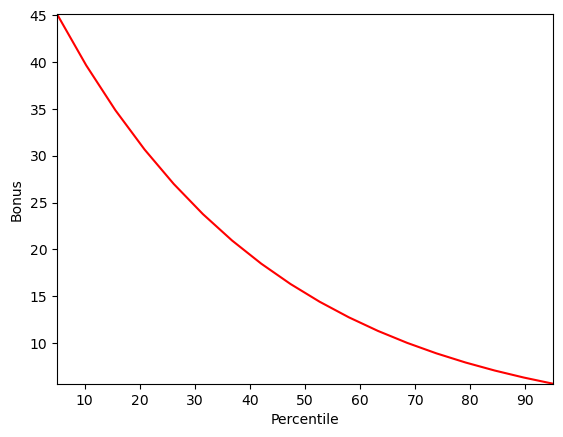

In [23]:
#This is just to show you the bonus curve. This is NOT part of the question.
import numpy as np
import sys
import matplotlib.pyplot as plt

a = 50
b = 0.025
c = 1 
x = np.linspace(5, 95, 18, endpoint = True)
y = (a * np.exp(-b*x)) + c

#print(list(zip(x,y)))
plt.plot(x, y, '-r')

axes = plt.gca()
axes.set_xlim([x.min(), x.max()])
axes.set_ylim([y.min(), y.max()])

plt.xlabel('Percentile')
plt.ylabel('Bonus')

plt.show()

while False: #set this to True to see your bonus points based on your hypothetical percentile
    try:
        x_in=float(input('percentile:'))
        bonus_out=np.round((a * np.exp(-b*x_in)) + c)
        print('At {:0.0f} percentile, you will get {:0.1f} bonus points'.format(x_in,bonus_out))
    except:
        print("Exiting")
        sys.exit(1)


In [24]:
#Your code here. Feel free to make as many cells as needed
